<a href="https://colab.research.google.com/github/leodenale/fastquant/blob/master/BRZ/BacktestNewsSentiment4Crypto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# uncomment to install in colab
# !pip install -e git+https://github.com/enzoampil/fastquant.git@master#egg=fastquant
!pip install -e git+https://github.com/leodenale/fastquant.git@master#egg=fastquant

## fetch stock data from yahoo finance

In [1]:
#from fastquant import get_yahoo_data

#TESLA=TSLA in yahoo finance 
#data = get_yahoo_data("TSLA", "2020-01-01", "2020-07-04")


from fastquant import get_crypto_data2

crypto = get_crypto_data2("BTC/USDT", "2020-01-01", "2020-07-04")

crypto



ValueError: ignored

## scrape news from business times website and compute sentiment

In [ ]:
from fastquant import get_bt_news_sentiment

#scrape the first 3 pages of https://www.businesstimes.com.sg/search/tesla?page=1&filter=headline_en
sentiments = get_bt_news_sentiment(keyword="tesla", page_nums=3)
sentiments

100%|██████████| 3/3 [01:35<00:00, 31.20s/it]


{datetime.date(2020, 5, 14): 0.762,
 datetime.date(2020, 5, 15): -0.415,
 datetime.date(2020, 5, 16): 0.607,
 datetime.date(2020, 5, 18): -0.445,
 datetime.date(2020, 5, 20): -0.616,
 datetime.date(2020, 5, 30): 0.986,
 datetime.date(2020, 6, 3): 0.954,
 datetime.date(2020, 6, 4): 0.989,
 datetime.date(2020, 6, 5): 0.942,
 datetime.date(2020, 6, 6): 0.929,
 datetime.date(2020, 6, 12): 0.686,
 datetime.date(2020, 6, 13): 0.973,
 datetime.date(2020, 6, 28): 0.86,
 datetime.date(2020, 7, 3): 0.991,
 datetime.date(2020, 7, 4): 0.99,
 datetime.date(2020, 7, 7): 0.988,
 datetime.date(2020, 7, 10): 0.987,
 datetime.date(2020, 7, 11): 0.842,
 datetime.date(2020, 7, 13): 0.8,
 datetime.date(2020, 7, 16): 0.991,
 datetime.date(2020, 7, 21): 0.982,
 datetime.date(2020, 7, 22): 0.996,
 datetime.date(2020, 7, 23): -0.254,
 datetime.date(2020, 7, 24): 0.949,
 datetime.date(2020, 7, 25): -0.457,
 datetime.date(2020, 8, 6): 0.997}

## run backtest

In [ ]:
import matplotlib.pyplot as pl
pl.style.use("default")

Starting Portfolio Value: 100000.00
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
commission : 0.0075
===Strategy level arguments===
sentiment threshold : 0.2
2020-05-14, BUY CREATE, 803.33
2020-05-14, Cash: 100000.0
2020-05-14, Price: 803.3300170898438
2020-05-14, Buy prop size: 123
2020-05-14, Afforded size: 123
2020-05-14, Final size: 123
2020-05-15, BUY EXECUTED, Price: 803.33, Cost: 98809.59, Comm 741.07
2020-05-15, SELL CREATE, 813.63
2020-05-18, SELL EXECUTED, Price: 813.63, Cost: 98809.59, Comm 750.57
2020-05-18, OPERATION PROFIT, GROSS 1266.90, NET -224.75
2020-06-03, BUY CREATE, 882.96
2020-06-03, Cash: 99775.25287826538
2020-06-03, Price: 882.9600219726562
2020-06-03, Buy prop size: 112
2020-06-03, Afforded size: 112
2020-06-03, Final size: 112
2020-06-04, BUY EXECUTED, Price: 882.96, Cost: 98891.52, Comm 741.69
Final Portfolio Value: 135511.96782699585
Final PnL: 35511.97
Number of strat runs: 1
Number of strats per run: 1
Strat names: [<class '

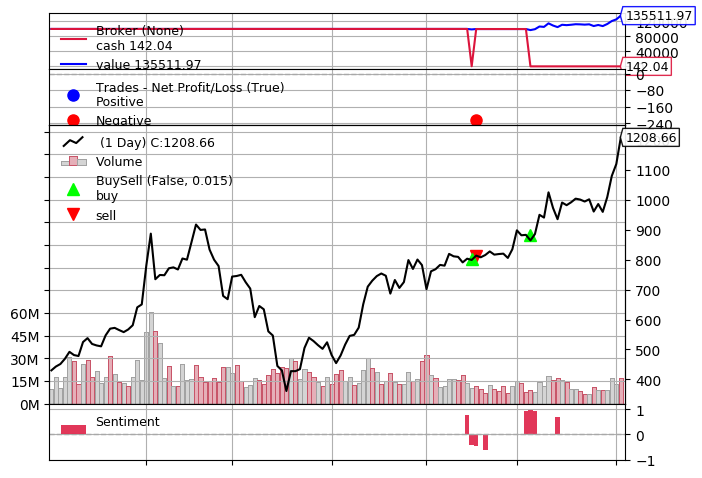

,init_cash,buy_prop,sell_prop,commission,execution_type,senti,rtot,ravg,rnorm,rnorm100,sharperatio,pnl,final_value
0,100000,1,1,0.0075,close,0.2,0.30389,0.002393,0.827582,82.758218,None,35511.97,135511.967827


In [ ]:
from fastquant import backtest

#initiate buy/sell if senti>0.2/senti<-0.2
backtest("sentiment", data, sentiments=sentiments, senti=0.2)